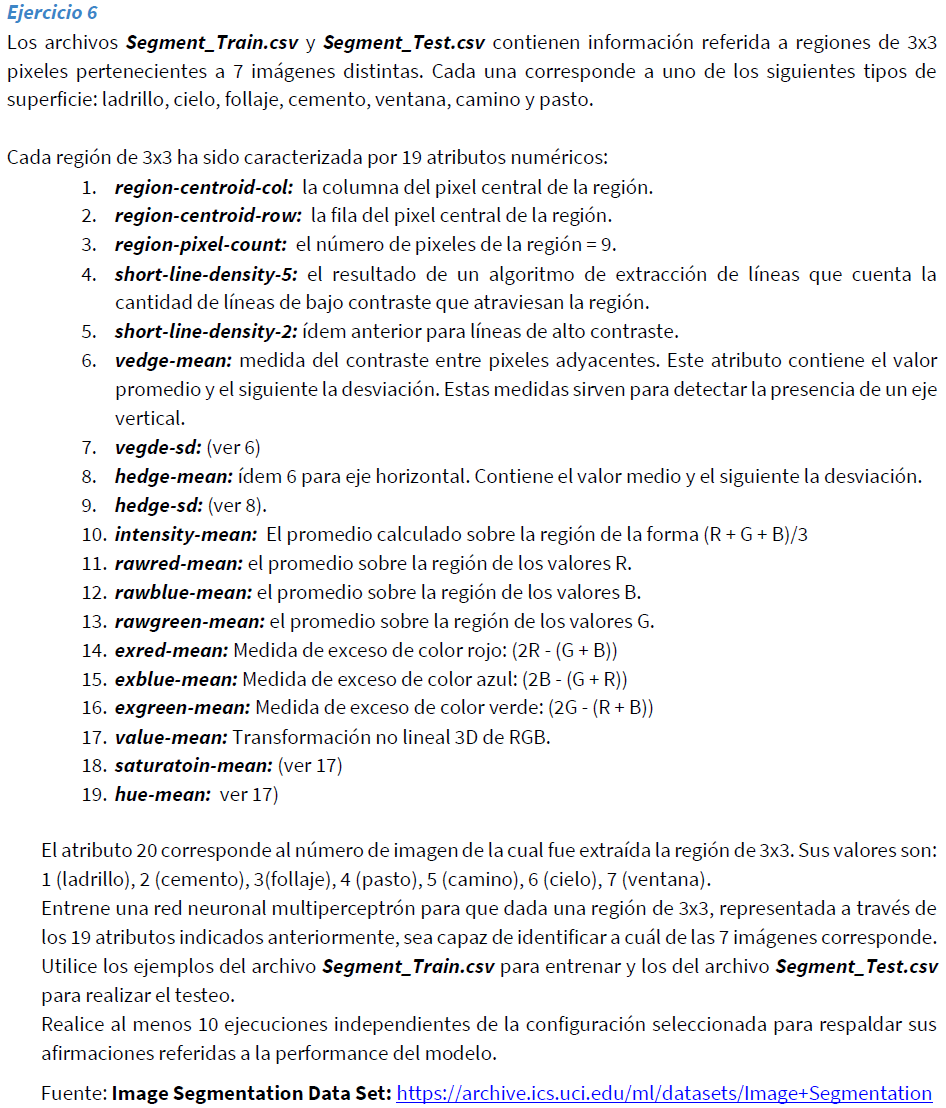

In [1]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../../Datos-Fuentes/Fuentes/'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../../Datos-Fuentes/Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

,index,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,GRASS,110.0,189.0,9,0.0,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,GRASS,86.0,187.0,9,0.0,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,GRASS,225.0,244.0,9,0.0,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,GRASS,47.0,232.0,9,0.0,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,GRASS,97.0,186.0,9,0.0,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654


,index,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


<Axes: >

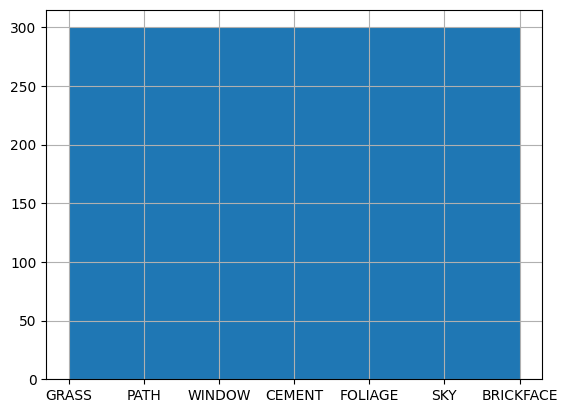

In [9]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos
import numpy as np

from sklearn import preprocessing, model_selection
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt

nombre_archivo_train = DATOS_DIR + 'Segment_Train.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo_train, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df_train = pd.read_csv(nombre_archivo_train, encoding=result['encoding'])


nombre_archivo_test = DATOS_DIR + 'Segment_Test.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo_test, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df_test = pd.read_csv(nombre_archivo_test, encoding=result['encoding'])

# Hago que el indice se muestre como columnna
df_train = df_train.reset_index()
df_test = df_test.reset_index()

# Para hacer una inspección rápida de los datos
display(df_train.head())
display(df_test.head())
#df.describe()
df_train['index'].hist(bins=7)

## Seleccion de atributos y target

In [10]:
# %% separa atributos y clases
X_train = np.array(df_train.iloc[:,1:])  # recupera todas las columnas salvo la primera (es la clase)
Y_train = np.array(df_train.iloc[:,0])    # recupera solo la última columna (es la clase)
X_test = np.array(df_test.iloc[:,1:])  # recupera todas las columnas salvo la primera (es la clase)
Y_test = np.array(df_test.iloc[:,0])    # recupera solo la última columna (es la clase)

# Binarizador para convertir el nombre de la clase en one hot encoding
binarizer = preprocessing.LabelBinarizer()

# Binariza cada clase como una combinación de un 1 y 0s
Y_train = binarizer.fit_transform(Y_train)
Y_test = binarizer.fit_transform(Y_test)

## Algoritmo iterativo para ver performance del modelo

Efectividad promedio entrenamiento = 96.66666666666666
Score promedio entrenamiento = 0.9650000000000001

Efectividad promedio testeo = 95.95238095238095
Score promedio testeo = 0.9571428571428571


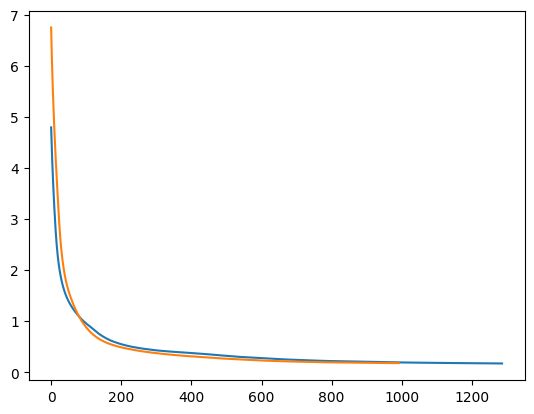

In [21]:
ITERACIONES=2
efectividad_testeo = 0
score_testeo = 0
efectividad_entrenamiento = 0
score_entrenamiento = 0

for i in range(ITERACIONES):
    #print(f"Iteracion {i}")

    #print('\nDatos de Entrenamiento: %d   Datos de Testeo: %d' % (len(Y_train), len(Y_test) ))

    # Escala los atributos de los ejemplo
    scaler = preprocessing.StandardScaler()
    #scaler = preprocessing.MinMaxScaler()
    X_train  = scaler.fit_transform( X_train )
    X_test   = scaler.transform( X_test )


    #print("     Entrenamiento")
    FunH = 'relu'   # identity logistic tanh relu
    ocultas = (9)

    alfa = 0.01
    MAX_ITE = 2000

    modelo = MLPClassifier(max_iter=MAX_ITE, hidden_layer_sizes=ocultas, alpha=alfa,
                        solver='adam', activation=FunH, tol=1e-4 ,
                        verbose=False).fit(X_train, Y_train)

    #  ########### Medición del entrenamiento ######################
    Y_pred = modelo.predict(X_train)
    score = modelo.score(X_train, Y_train)

    # "invierte" la transformacion binaria para obtener los nombres de las clases
    Y_it = binarizer.inverse_transform(Y_train)
    Y_pred_it = binarizer.inverse_transform(Y_pred)

    # calculo manual del accuracy
    #print('         Efectividad: %6.2f%%' % (100*(Y_pred_it == Y_it).sum()/len(Y_it)) )
    #print('         Score: %6.2f%%' % (score) )
    efectividad_entrenamiento+=100*(Y_pred_it == Y_it).sum()/len(Y_it)
    score_entrenamiento+=score

    plt.plot(modelo.loss_curve_)


    #print("     Testeo")
    #  ########### Medición del testeo ######################
    Y_pred = modelo.predict(X_test)
    score = modelo.score(X_test, Y_test)

    # "invierte" la transformacion binaria para obtener los nombres de las clases
    Y_it = binarizer.inverse_transform(Y_test)
    Y_pred_it = binarizer.inverse_transform(Y_pred)

    # calculo manual del accuracy
    #print('         Efectividad: %6.2f%%' % (100*(Y_pred_it == Y_it).sum()/len(Y_it)) )
    #print('         R2 Score: %6.2f%%' % (score) )
    efectividad_testeo+=100*(Y_pred_it == Y_it).sum()/len(Y_it)
    score_testeo+=score

print(f"Efectividad promedio entrenamiento = {efectividad_entrenamiento/ITERACIONES}")
print(f"Score promedio entrenamiento = {score_entrenamiento/ITERACIONES}\n")

print(f"Efectividad promedio testeo = {efectividad_testeo/ITERACIONES}")
print(f"Score promedio testeo = {score_testeo/ITERACIONES}")